# Ensemble estimators

In this part, we build ensemble estimators, which make predictions based on the predictions of base estimators. To avoid overfitting, we train the ensemble estimators on the cross-validation set rather than the training set we used for the training of base estimators. 

Here we tried 3 strategies to build ensemble estimators (weighted average, Ridge regression, and random forest regressor).

In [1]:
import sys
import traceback
import pandas as pd
import numpy as np
import time
from copy import deepcopy

from sklearn.base import BaseEstimator
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

from sklearn.linear_model import Ridge, RidgeCV
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

from scipy import sparse

import pickle

from IPython.display import display, HTML, Markdown

import matplotlib
import matplotlib.pyplot as plt

import seaborn as sns
pd.set_option('display.width', 15000)
pd.set_option('display.max_columns', 100)
sns.set_style("whitegrid", {'axes.grid' : False})
sns.set_context('poster')
%matplotlib inline

from surprise import Dataset, Reader
from surprise import NormalPredictor, BaselineOnly, SVD, SVDpp, NMF, \
SlopeOne, CoClustering, KNNBasic, KNNWithMeans, KNNBaseline

from recommender import plot_cm, get_results, show_results, IO, \
show_summaries, get_base_predictions, get_multi_base_predictions
from recommender import ModeClassifier, BaselineMean, BaselineRegression, ALS1, ALS2, RS_surprise, RS_ensemble

In [2]:
city = 'Champaign'
data_dir = 'data/{}/'.format(city)

results = IO(data_dir + 'results/results.pkl').read_pickle()
is_successful = IO(data_dir + 'results/is_successful.pkl').read_pickle()
datanames = IO(data_dir + 'results/datanames.pkl').read_pickle()

ys_base_train, ys_base_test, ys_base_cv, weights = get_base_predictions(results, is_successful, datanames, thres=0.05)
X_train, y_train, X_test, y_test, X_cv, y_cv = IO(data_dir + 'data_split.pkl').read_pickle()
data_split = [ys_base_train, y_train, ys_base_test, y_test, ys_base_cv, y_cv]
#IO(data_dir + '061_data_split.pkl').to_pickle(data_split)

## Ensemble of collaborative filtering models

### Ensemble1 (weighted average)

Fitting time: 0.0000 s.  
            RMSE on training set: 0.8115.  
            RMSE on test set: 1.3059.  
            $R^2$ on training set: 0.6788.   
            $R^2$ on test set: 0.1897.  
            Classification accuracy on training set: 0.4174.  
            Classification accuracy on test set: 0.2529.
            

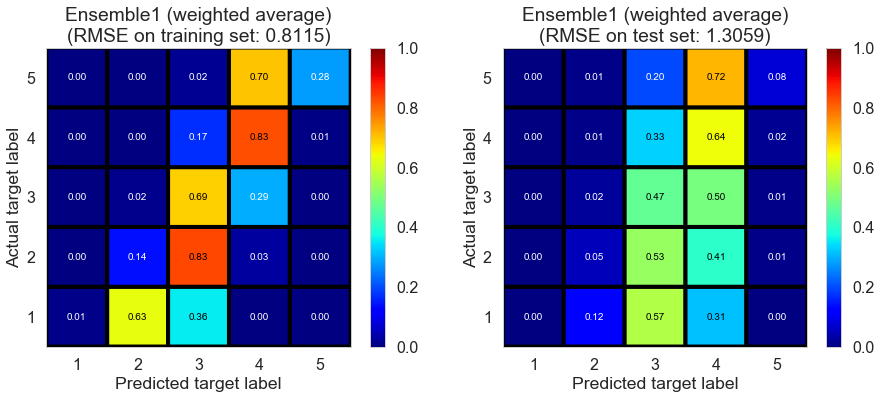

In [3]:
#ys_base_train, y_train, ys_base_test, y_test, ys_base_cv, y_cv = IO(data_dir + '061_data_split.pkl').read_pickle()

ens = RS_ensemble(estimator=None).fit(ys_base=ys_base_cv, y=y_cv, weights=weights)
show_results(ens, 'Ensemble1 (weighted average)', X_train=ys_base_train, y_train=y_train, \
             X_test=ys_base_test, y_test=y_test, show_cv=False)

### Ensemble1 (regression)

Fitting time: 0.0060 s.  
            RMSE on training set: 1.1826.  
            RMSE on test set: 1.3031.  
            $R^2$ on training set: 0.3178.   
            $R^2$ on test set: 0.1931.  
            Classification accuracy on training set: 0.2656.  
            Classification accuracy on test set: 0.2574.
            

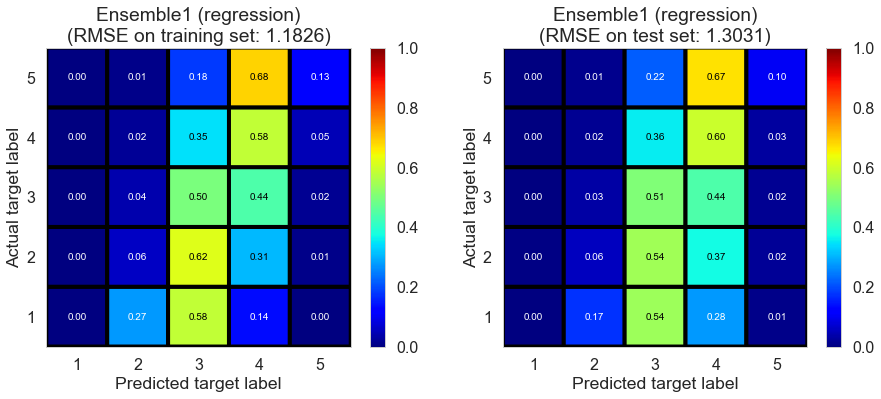

In [4]:
ens = RS_ensemble(estimator=RidgeCV()).fit(ys_base=ys_base_cv, y=y_cv, weights=weights)
show_results(ens, 'Ensemble1 (regression)', X_train=ys_base_train, y_train=y_train, \
             X_test=ys_base_test, y_test=y_test, show_cv=False)

### Ensemble1 (random forest)

Fitting time: 0.2270 s.  
            RMSE on training set: 0.9923.  
            RMSE on test set: 1.3026.  
            $R^2$ on training set: 0.5198.   
            $R^2$ on test set: 0.1937.  
            Classification accuracy on training set: 0.3478.  
            Classification accuracy on test set: 0.2558.
            

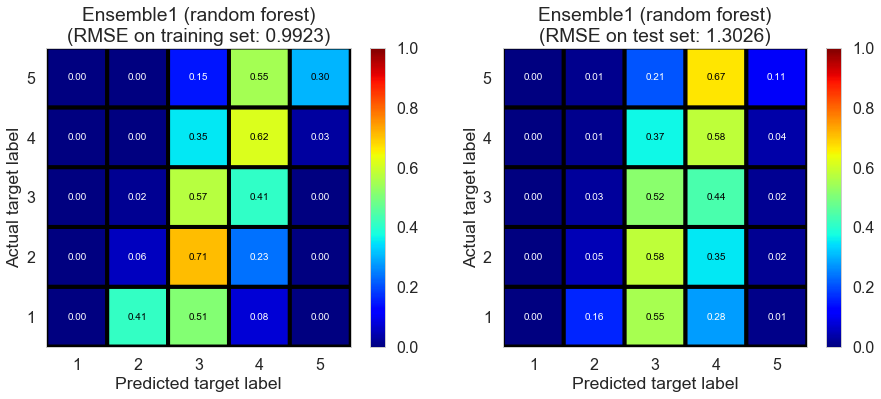

In [5]:
ens = RS_ensemble(estimator=RandomForestRegressor(n_estimators=50, max_depth=3))\
.fit(ys_base=ys_base_cv, y=y_cv, weights=weights)
show_results(ens, 'Ensemble1 (random forest)', X_train=ys_base_train, y_train=y_train, \
             X_test=ys_base_test, y_test=y_test, show_cv=False)

## Ensemble of collaborative filtering and content filtering models

In [6]:
city = 'Champaign'
fig_dir = 'figs/modeling/{}/'.format(city)
data_dir = 'data/{}/'.format(city)

results = [IO(data_dir + 'results/results.pkl').read_pickle(), IO(data_dir + 'results05/results.pkl').read_pickle()]
is_successful = [IO(data_dir + 'results/is_successful.pkl').read_pickle(), \
                 IO(data_dir + 'results05/is_successful.pkl').read_pickle()]
datanames = [IO(data_dir + 'results/datanames.pkl').read_pickle(), \
             IO(data_dir + 'results05/datanames.pkl').read_pickle()]

ys_base_train, ys_base_test, ys_base_cv, weights = \
get_multi_base_predictions(results, is_successful, datanames, thres=0.05)
X_train, y_train, X_test, y_test, X_cv, y_cv = IO(data_dir + 'data_split.pkl').read_pickle()

### Ensemble2 (weighted average)

Fitting time: 0.0000 s.  
            RMSE on training set: 0.8826.  
            RMSE on test set: 1.1566.  
            $R^2$ on training set: 0.6200.   
            $R^2$ on test set: 0.3643.  
            Classification accuracy on training set: 0.4029.  
            Classification accuracy on test set: 0.3064.
            

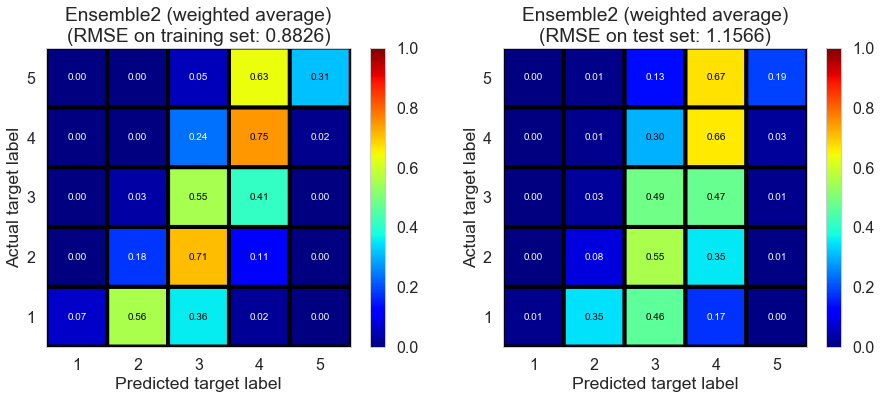

In [7]:
ens = RS_ensemble(estimator=None).fit(ys_base=ys_base_cv, y=y_cv, weights=weights)
show_results(ens, 'Ensemble2 (weighted average)', X_train=ys_base_train, y_train=y_train, \
             X_test=ys_base_test, y_test=y_test, show_cv=False)

### Ensemble2 (regression)

Fitting time: 0.0040 s.  
            RMSE on training set: 1.2147.  
            RMSE on test set: 1.0813.  
            $R^2$ on training set: 0.2803.   
            $R^2$ on test set: 0.4444.  
            Classification accuracy on training set: 0.3512.  
            Classification accuracy on test set: 0.4062.
            

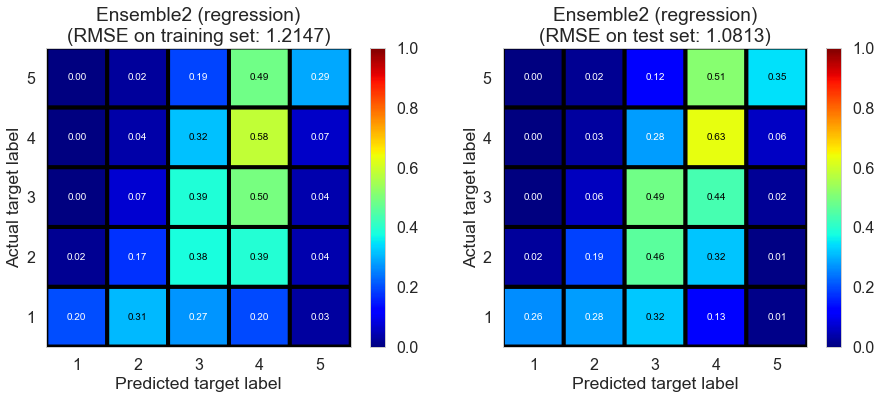

In [8]:
ens = RS_ensemble(estimator=RidgeCV()).fit(ys_base=ys_base_cv, y=y_cv, weights=weights)
show_results(ens, 'Ensemble2 (regression)', X_train=ys_base_train, y_train=y_train, \
             X_test=ys_base_test, y_test=y_test, show_cv=False)

### Ensemble2 (random forest)

Fitting time: 0.2870 s.  
            RMSE on training set: 1.0583.  
            RMSE on test set: 1.0853.  
            $R^2$ on training set: 0.4537.   
            $R^2$ on test set: 0.4403.  
            Classification accuracy on training set: 0.4131.  
            Classification accuracy on test set: 0.4123.
            

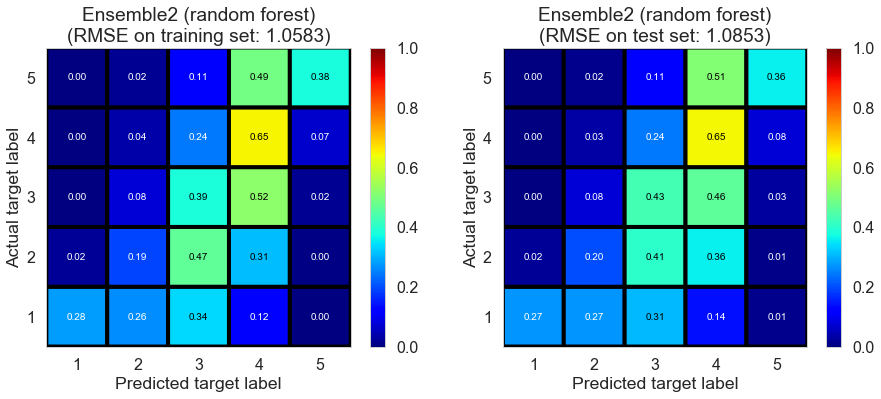

In [13]:
ens = RS_ensemble(estimator=RandomForestRegressor(n_estimators=50, max_depth=3))\
.fit(ys_base=ys_base_cv, y=y_cv, weights=weights)
show_results(ens, 'Ensemble2 (random forest)', X_train=ys_base_train, y_train=y_train, \
             X_test=ys_base_test, y_test=y_test, show_cv=False)